**Day 13: Advanced Techniques for Handling Missing Data in Python**

**Objective**
- Deepen understanding of handling missing data using Python, focusing on various imputation techniques, best practices, and integrating statistical tests from R for data analysis.

**Prerequisites**
- Intermediate skills in Python, Pandas,
NumPy, and Scikit-Learn.

- Basic understanding of statistical methods.

- Python environment with necessary libraries and R integration using rpy2.

- Dataset: https://github.com/100daysofml/100daysofml.github.io/blob/main/content/Week_03/titanic.csv

**Understanding Missing Data**

**Types of Missing Data**

1. Missing Completely at Random (MCAR): No relationship with any other data.

2. Missing at Random (MAR): Missingness related to observed data.

3. Missing Not at Random (MNAR): Missingness related to unobserved data.

In [1]:
from google.colab import files
uploaded = files.upload()


Saving titanic.csv to titanic (1).csv


In [2]:
# Step 1: Load and Explore the Dataset
import pandas as pd
titanic_data =pd.read_csv('titanic.csv')
print(titanic_data.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  Survived  
0  34.5      0      0   330911   7.8292   NaN        Q         0  
1  47.0      1      0   363272   7.0000   NaN        S         1  
2  62.0      0      0   240276   9.6875   NaN        Q         0  
3  27.0      0      0   315154   8.6625   NaN        S         0  
4  22.0      1      1  3101298  12.2875   NaN        S         1  


In [3]:
print(titanic_data.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64


In [4]:
# Step 2: Basic Imputation Techniques

- Mean/Median Imputation:
 - Use when: Data is MCAR and normally distributed.
 - Best Practice: Use median for skewed data.

In [5]:
# Filling Age with Median
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

<ipython-input-5-9de1862cfcd2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)


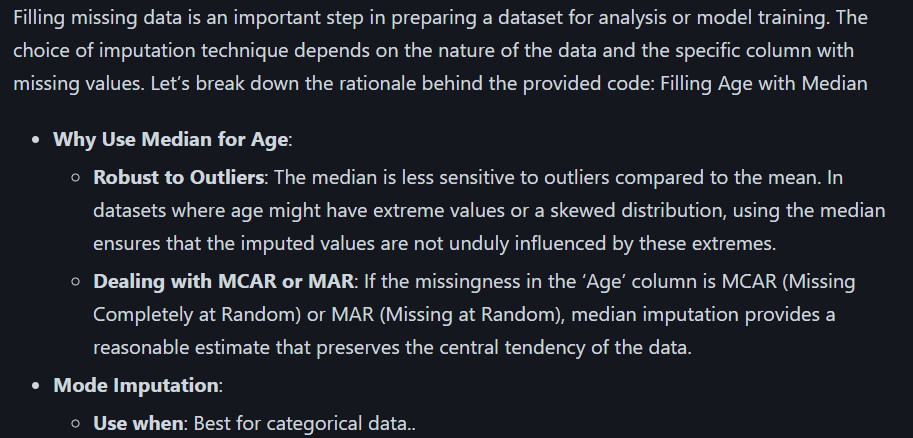

In [6]:
embarked_mode = titanic_data['Embarked'].mode()[0]
# print(embarked_mode)
titanic_data['Embarked'].fillna(embarked_mode, inplace=True)

<ipython-input-6-9eb4ed178b4b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Embarked'].fillna(embarked_mode, inplace=True)


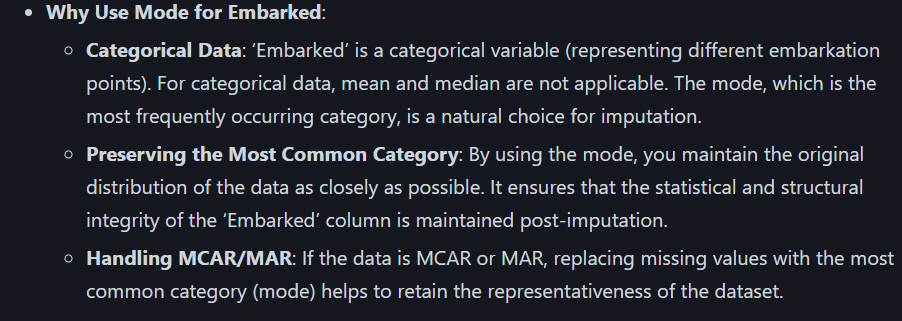

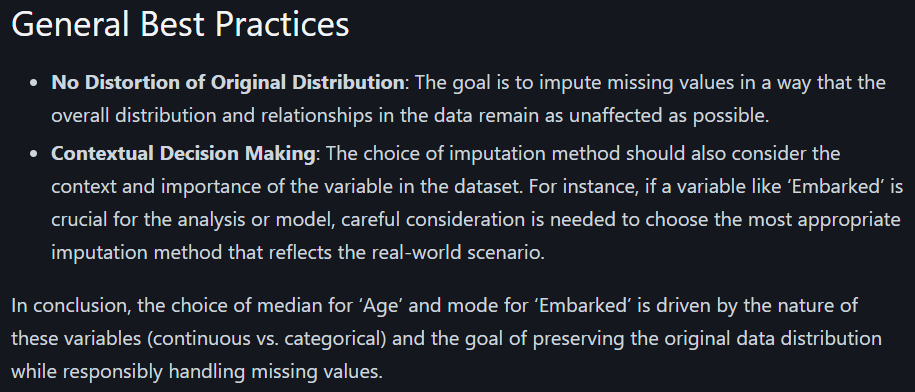

In [7]:
# Step 3: Advanced Imputation Techniques


- KNN Imputation:
 - Use when: Data has identifiable patterns.

In [8]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
numeric_columns = titanic_data.select_dtypes(include=['float64', 'int64'])
# print(numeric_columns)
titanic_data[numeric_columns.columns] = imputer.fit_transform(numeric_columns)

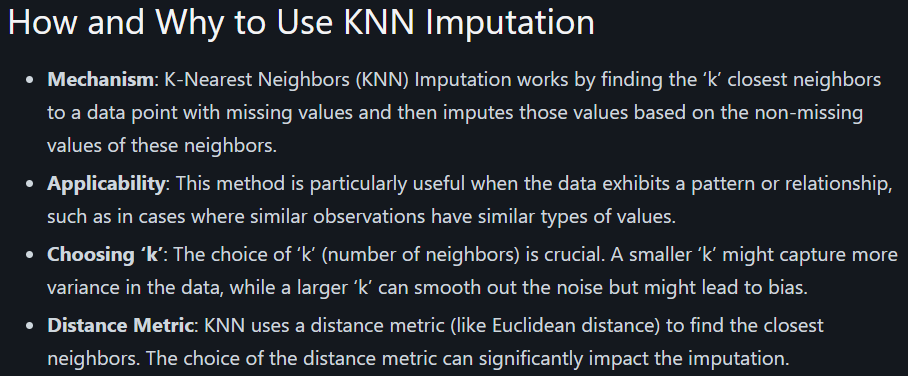

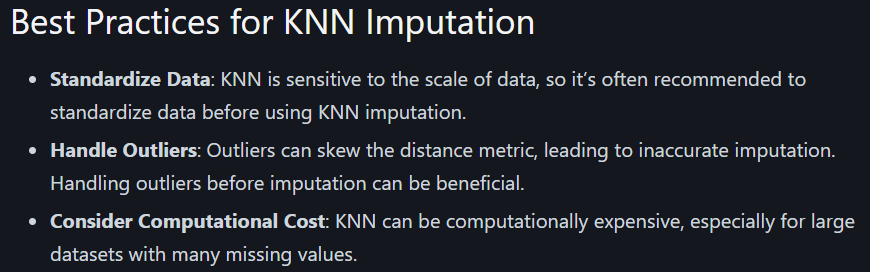

- Regression Impution
 - Use when: The missingness is MAR (Missing at Random) and can be predicted using other variables in the dataset.

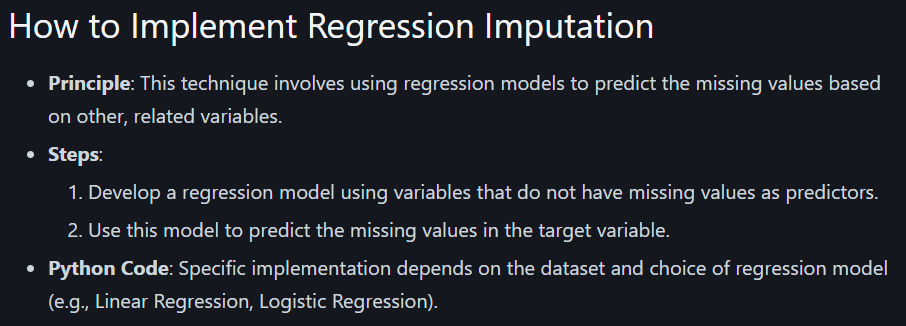

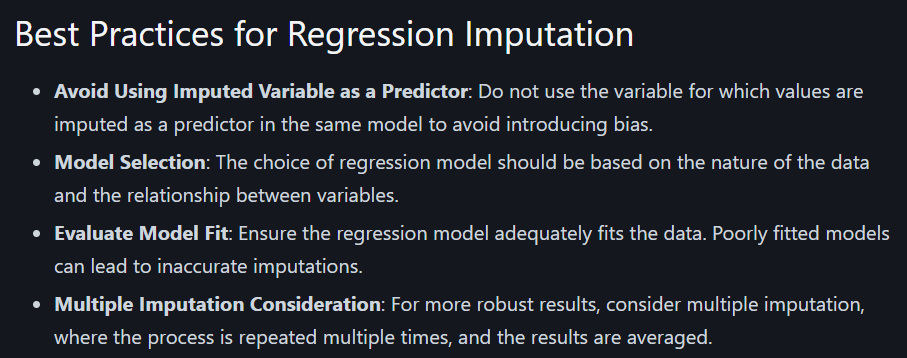

In [9]:
# print(titanic_data.isnull().sum())

In [10]:
# Step 4: Handling MNAR Data (Missing Not at Random)

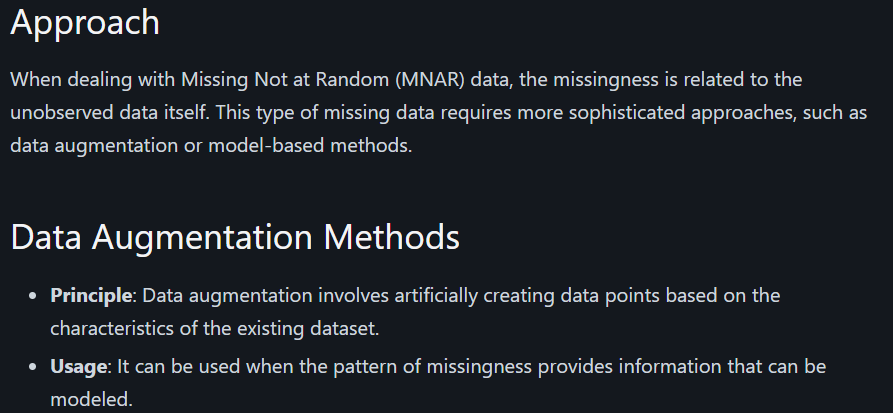

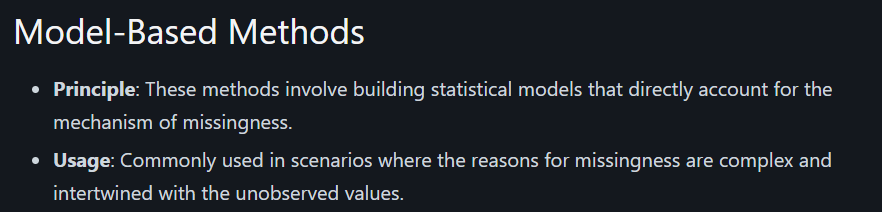

In [11]:
# Example Code: Handling MNAR Data Using Model-Based Approach

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import numpy as np
from sklearn.linear_model import BayesianRidge

#Using Iterative Imputer with BayesianRidge estimator
iterative_imputer = IterativeImputer(estimator=BayesianRidge(), missing_values=np.nan, max_iter=10, random_state=0)

numeric_data = titanic_data.select_dtypes(include=['float64', 'int64'])

#Assuming 'titanic_data' has some MNAR data
titanic_data_imputed = iterative_imputer.fit_transform(numeric_data)

#Replace original data with imputed data
titanic_data_im = pd.DataFrame(titanic_data_imputed, columns=numeric_data.columns)

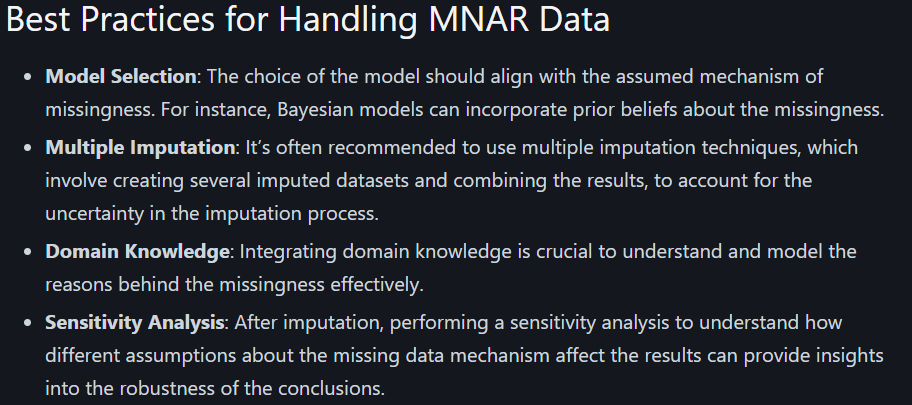

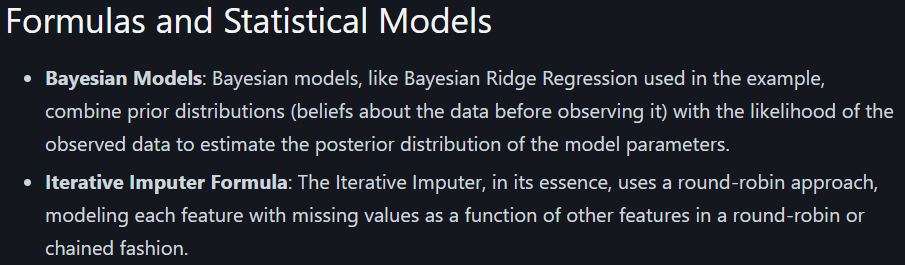

In [12]:
# Step 5: Evaluating the Impact of Imputation

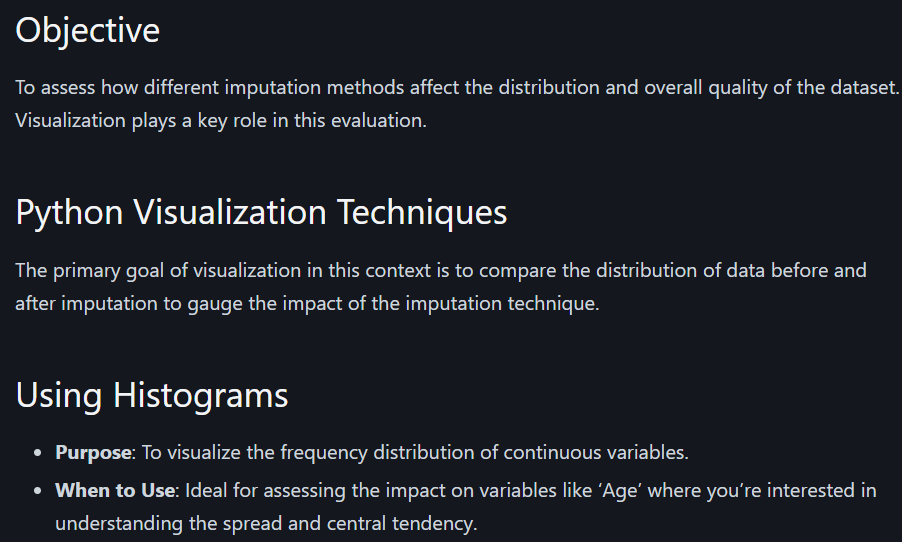

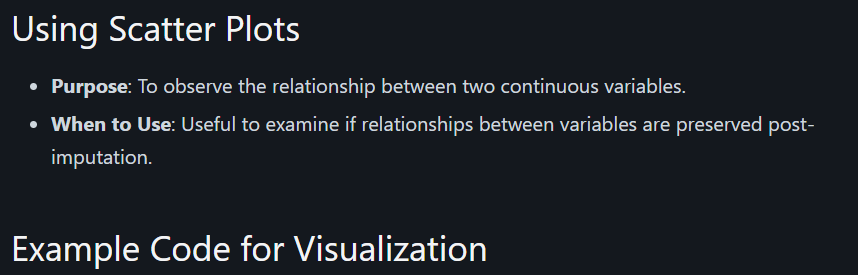

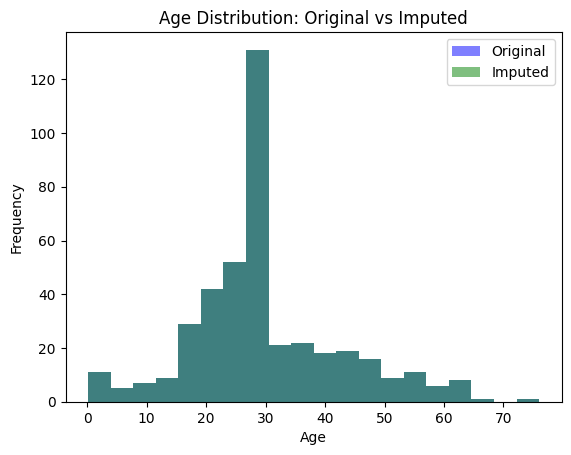

In [19]:
# Histogram for ‘Age’
import matplotlib.pyplot as plt

#Histogram of 'Age' before imputation
plt.hist(titanic_data['Age'].dropna(), bins=20, alpha=0.5, color='blue', label='Original')
#Histogram of 'Age' after imputation
plt.hist(titanic_data_im['Age'], bins=20, alpha=0.5, color='green', label='Imputed')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Comparison of Age Distribution: Original vs. Imputed')
plt.legend()
plt.show()



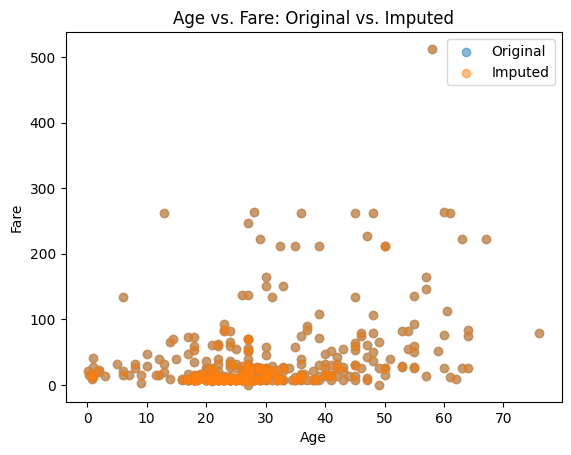

In [16]:
#Scatter plot to compare relationships - Example with 'Age' and 'Fare'
plt.scatter(titanic_data['Age'], titanic_data['Fare'], alpha=0.5, label='Original')
plt.scatter(titanic_data_im['Age'], titanic_data_im['Fare'], alpha=0.5, label='Imputed')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs. Fare: Original vs. Imputed')
plt.legend()
plt.show()

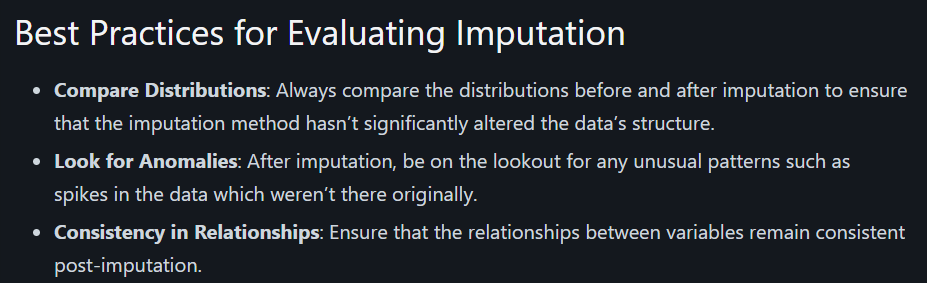

In [17]:
print(titanic_data['Age'].describe())  # Original
print(titanic_data_im['Age'].describe())  # Imputed


count    418.000000
mean      29.599282
std       12.703770
min        0.170000
25%       23.000000
50%       27.000000
75%       35.750000
max       76.000000
Name: Age, dtype: float64
count    418.000000
mean      29.599282
std       12.703770
min        0.170000
25%       23.000000
50%       27.000000
75%       35.750000
max       76.000000
Name: Age, dtype: float64


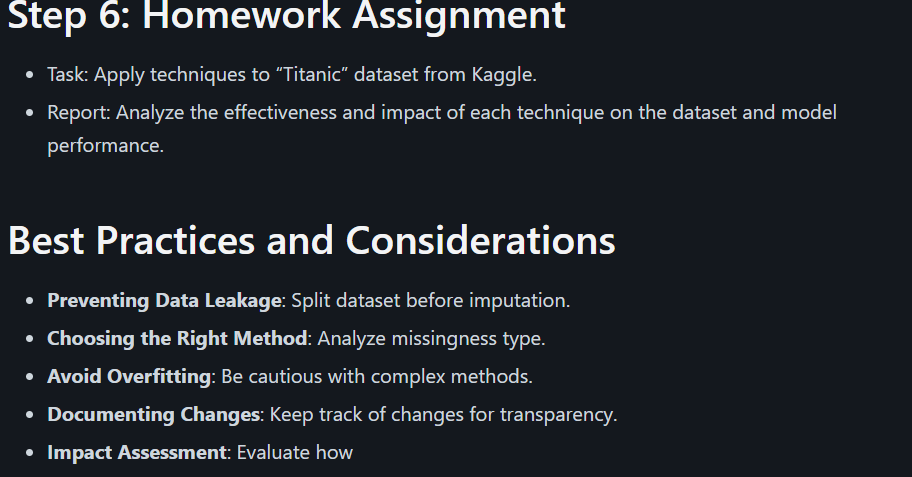

In [16]:
from google.colab import files
uploaded = files.upload()



Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [120]:
import pandas as pd
titanic_original = pd.read_csv('Titanic-Dataset.csv')
titanic = titanic_original.copy()
print(titanic.head())
print(titanic.isnull().sum())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Pa

In [121]:
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

<ipython-input-121-595430d40845>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
<ipython-input-121-595430d40845>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [112]:
# print(titanic.isnull().sum())

In [122]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
numeric_columns = titanic.select_dtypes(include=['float64', 'int64'])
titanic[numeric_columns.columns] = imputer.fit_transform(numeric_columns)

#Replace original data with imputed data
# imputed_data = pd.DataFrame(titanic, columns=numeric_columns.columns)

In [123]:
# print(titanic.isnull().sum())

In [124]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import numpy as np
from sklearn.linear_model import BayesianRidge

#Using Iterative Imputer with BayesianRidge estimator
imputer = IterativeImputer(estimator=BayesianRidge(), missing_values=np.nan, max_iter=10, random_state=0)

#Assuming 'titanic_data' has some MNAR data
numeric_col = titanic.select_dtypes(include=['float64', 'int64'])
titanic_imputed = imputer.fit_transform(numeric_col)

#Replace original data with imputed data
imputed_data = pd.DataFrame(titanic_imputed, columns=numeric_col.columns)


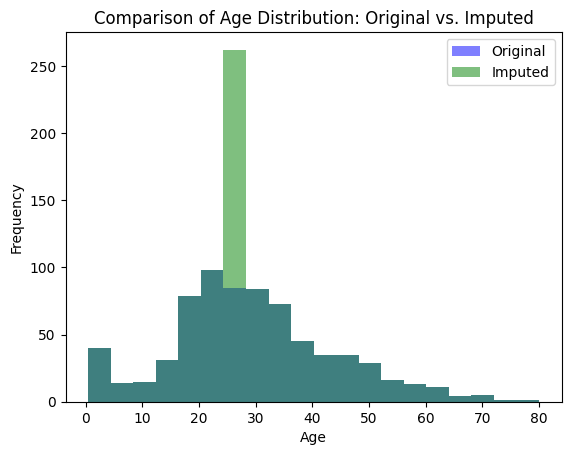

In [125]:
import matplotlib.pyplot as plt

plt.hist(titanic_original['Age'].dropna(),bins=20,alpha=0.5,color='blue',label='Original')
plt.hist(imputed_data['Age'], bins=20, alpha=0.5, color='green', label='Imputed')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Comparison of Age Distribution: Original vs. Imputed')
plt.legend()
plt.show()

**Testing Data**

**Integrating Little’s MCAR Test Using rpy2**

**Setting Up rpy2**

In [126]:
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri, globalenv

base = importr("base")
utils = importr("utils")

utils.chooseCRANmirror(ind=1)
pandas2ri.activate()

# Enable R magic in Jupyter
%load_ext rpy2.ipython

**Installing R Packages**

In [127]:
utils.install_packages("remotes")
%R remotes::install_github("njtierney/naniar")
%R library(naniar)

(as ‘lib’ is unspecified)







	‘/tmp/RtmpiaxpdU/downloaded_packages’



These packages have more recent versions available.
It is recommended to update all of them.
Which would you like to update?

1: All                          
2: CRAN packages only           
3: None                         
4: rlang (1.1.5 -> 1.1.6) [CRAN]

Enter one or more numbers, or an empty line to skip updates: 
── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpiaxpdU/remotesef44d268de/njtierney-naniar-eead952/DESCRIPTION’ ... OK
* preparing ‘naniar’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘naniar_1.1.0.9000.tar.gz’



Installing 6 packages: plyr, gridExtra, UpSetR, viridis, visdat, norm
Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cloud.r-project.org/src/contrib/plyr_1.8.9.tar.gz'
Content type 'application/x-gzip' length 401488 bytes (392 KB)
downloaded 392 KB

trying URL 'https://cloud.r-project.org/src/contrib/gridExtra_2.3.tar.gz'
Content type 'application/x-gzip' length 1062844 bytes (1.0 MB)
downloaded 1.0 MB

trying URL 'https://cloud.r-project.org/src/contrib/UpSetR_1.4.0.tar.gz'
Content type 'application/x-gzip' length 4194664 bytes (4.0 MB)
downloaded 4.0 MB

trying URL 'https://cloud.r-project.org/src/contrib/viridis_0.6.5.tar.gz'
Content type 'application/x-gzip' length 3047363 bytes (2.9 MB)
downloaded 2.9 MB

trying URL 'https://cloud.r-project.org/src/contrib/visdat_0.6.0.tar.gz'
Content type 'application/x-gzip' length 1311056 bytes (1.3 MB)
downloaded 1.3 MB

trying URL 'https://cloud.r-project.org/src/contrib/norm_1.0-11.1.ta

array(['naniar', 'tools', 'stats', 'graphics', 'grDevices', 'utils',
       'datasets', 'methods', 'base'], dtype='<U9')

**Performing Little’s MCAR Test**

In [131]:
globalenv["r_df"] = titanic_original
%R mcar_test(r_df)

/usr/local/lib/python3.11/dist-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "Cabin". Fall back to string conversion. The error is: Series can only be of one type, or None (and here we have <class 'float'> and <class 'str'>). If happening with a pandas DataFrame the method infer_objects() will normalize data types before conversion.
  warnings.warn('Error while trying to convert '


,statistic,df,p.value,missing.patterns
1,598.5422,43.0,0.0,5


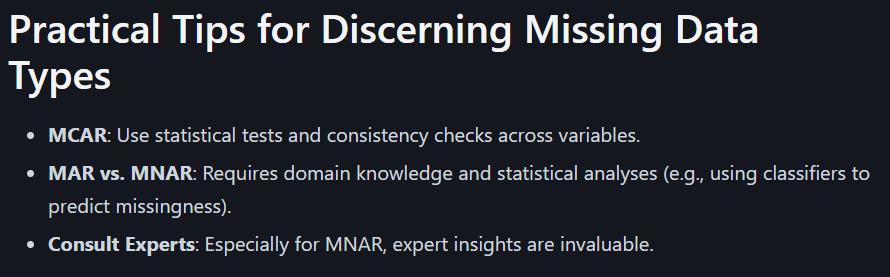